In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# params
totalTime = 4 * 60 + 53
totalFrame = 8511

# set time stamps
pd.set_option("display.precision", 16)
timeStamps = np.linspace(0, totalTime, totalFrame)
df_time = pd.DataFrame(timeStamps, columns = ['time'])
# get object count by yolo
df_objectCount = pd.read_csv('./data/objectCount', skiprows = [1])
# concatenate two df
df_concat = pd.concat([df_objectCount, df_time], axis = 1)

# get object counted manually
df_groudTruth = pd.read_csv('./data/objectCount_manually.txt')
# calculate the number of frames of each episode
timeInterval = float(df_concat['time'][1])
frameNumber = [0]
for t in df_groudTruth['endingTime']:
    frameNum = math.floor(float(t) / timeInterval)
    frameNumber.append(frameNum)
frameNumber_forEachInterval = [x-y for x,y in zip(frameNumber[1:], frameNumber[:-1])]
# replicate rows according to the frame count
df_groundTruth_full = df_groudTruth.iloc[[0]]
for i in range(df_groudTruth.shape[0]):
    for j in range(frameNumber_forEachInterval[i]):
        df_groundTruth_full = pd.concat([ df_groundTruth_full, df_groudTruth.iloc[[i]] ], ignore_index = True)
# get data for analysis
df_data = pd.concat([df_concat, df_groundTruth_full], axis = 1)
df_data.drop(columns = ['time', 'endingTime'], inplace = True)

Average difference by original detection is 4.636000469980026
Average difference by rolling max is 3.9804837164750957


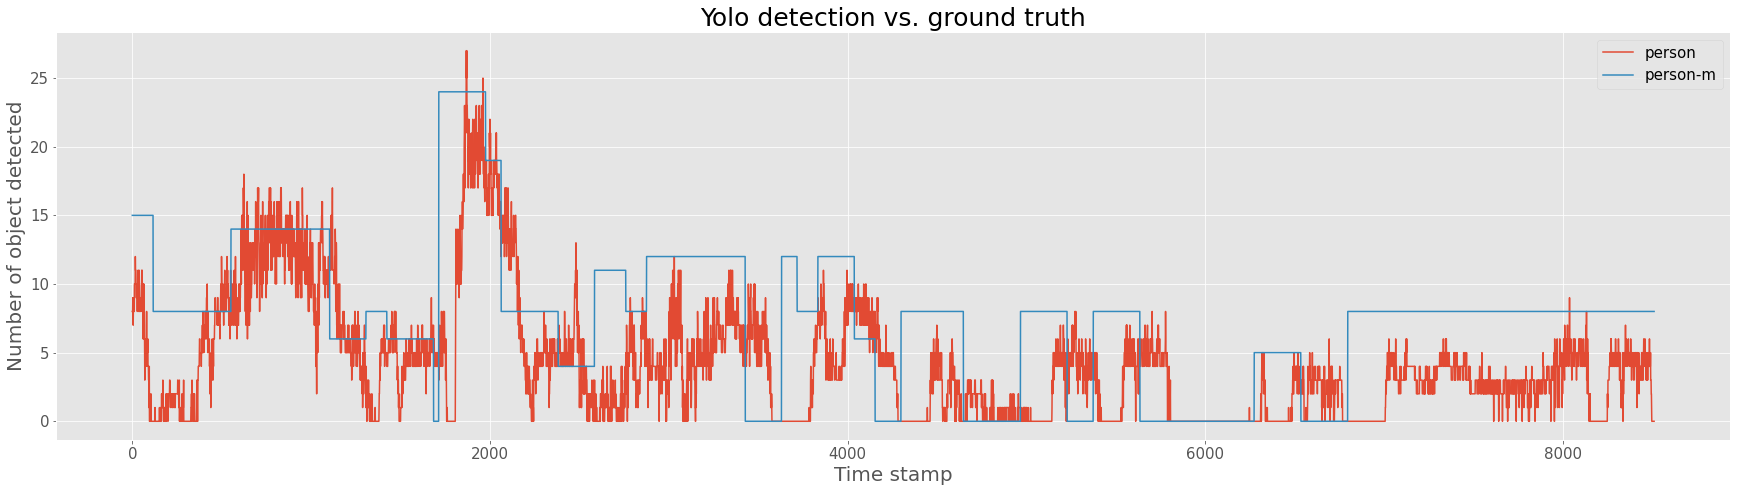

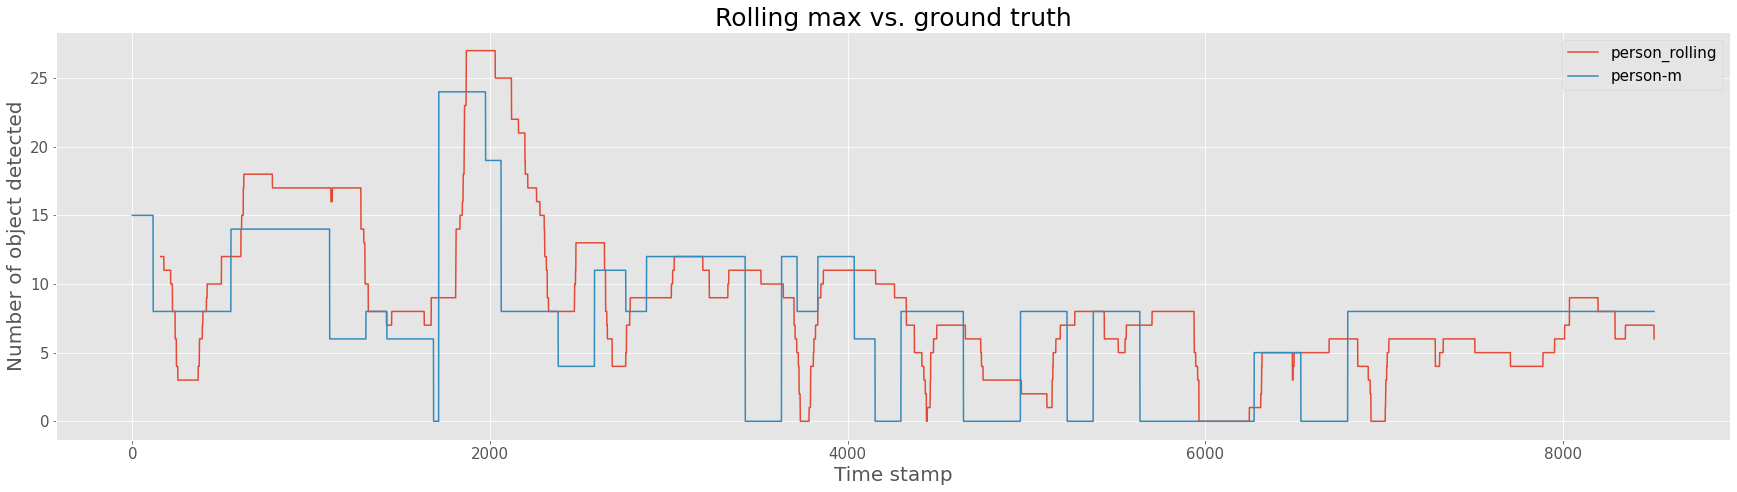

In [15]:
# rolling and draw
matplotlib.style.use('ggplot')
df_data['person_rolling'] = df_data.person.rolling(160).max() # the window length is about 6 seconds
personCount = df_data[['person', 'person-m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Yolo detection vs. ground truth',fontsize = 25)

personCount2 = df_data[['person_rolling', 'person-m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Rolling max vs. ground truth',fontsize = 25)

lossPerson = (df_data['person'] - df_data['person-m']).abs().mean()
lossPerson2 = (df_data['person_rolling'] - df_data['person-m']).abs().mean()
print('Average difference by original detection is', lossPerson)
print('Average difference by rolling max is', lossPerson2)

Average difference by original detection is 0.6549171660204441
Average difference by rolling max is 0.6212085586644721


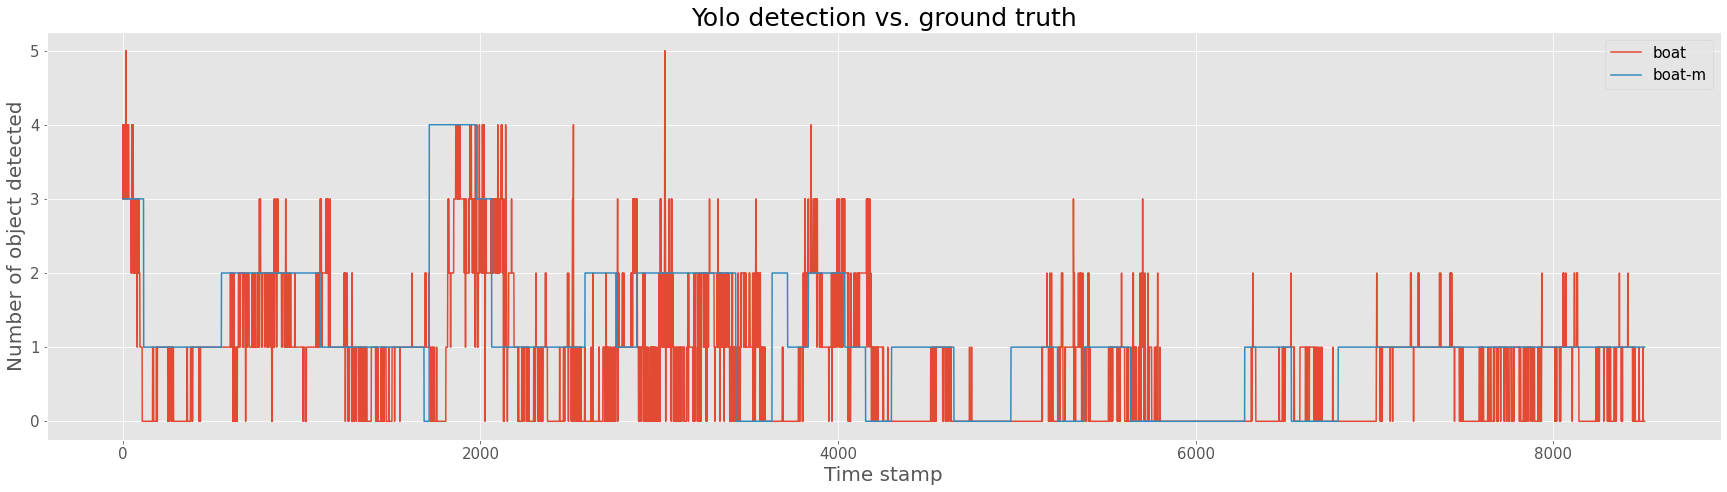

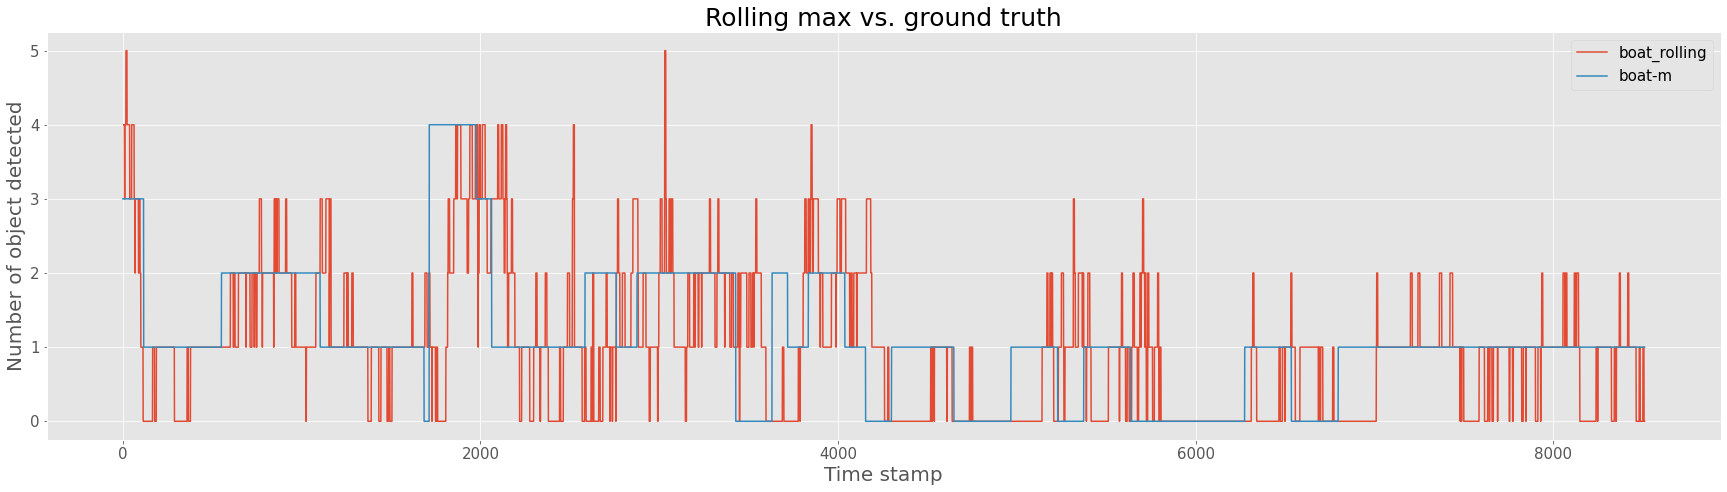

In [16]:
df_data['boat_rolling'] = df_data.boat.rolling(6).max()
boatCount = df_data[['boat', 'boat-m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Yolo detection vs. ground truth',fontsize = 25)

boatCount2 = df_data[['boat_rolling', 'boat-m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Rolling max vs. ground truth',fontsize = 25)

lossBoat = (df_data['boat'] - df_data['boat-m']).abs().mean()
lossBoat2 = (df_data['boat_rolling'] - df_data['boat-m']).abs().mean()
print('Average difference by original detection is', lossBoat)
print('Average difference by rolling max is', lossBoat2)

Average difference by original detection is 1.273293385031136
Average difference by rolling max is 0.259110269758637


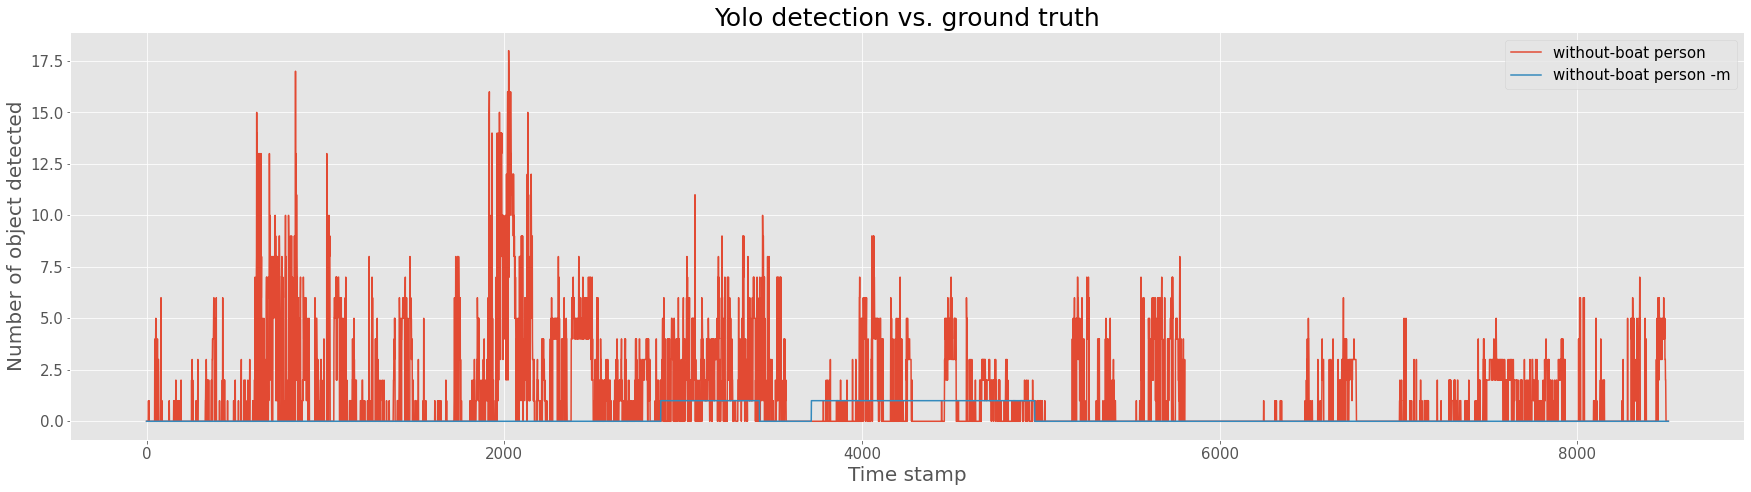

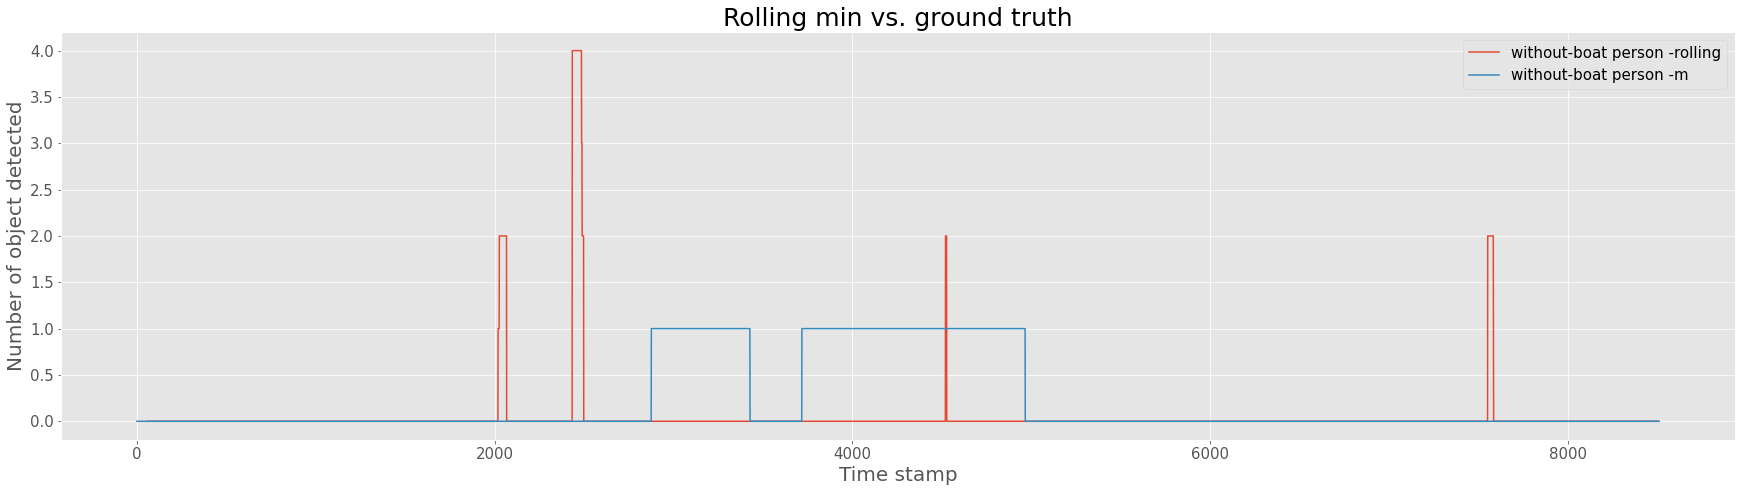

In [18]:
df_data['without-boat person -rolling'] = df_data['without-boat person'].rolling(60).min()
personWithoutBoatCount = df_data[['without-boat person', 'without-boat person -m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Yolo detection vs. ground truth',fontsize = 25)

personWithoutBoatCount2 = df_data[['without-boat person -rolling', 'without-boat person -m']].plot(figsize=(30, 7.5))
plt.xlabel('Time stamp', fontsize = 20)
plt.ylabel('Number of object detected', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.title('Rolling min vs. ground truth',fontsize = 25)

lossPersonWithoutBoat = (df_data['without-boat person'] - df_data['without-boat person -m']).abs().mean()
lossPersonWithoutBoat2 = (df_data['without-boat person -rolling'] - df_data['without-boat person -m']).abs().mean()
print('Average difference by original detection is', lossPersonWithoutBoat)
print('Average difference by rolling max is', lossPersonWithoutBoat2)